In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

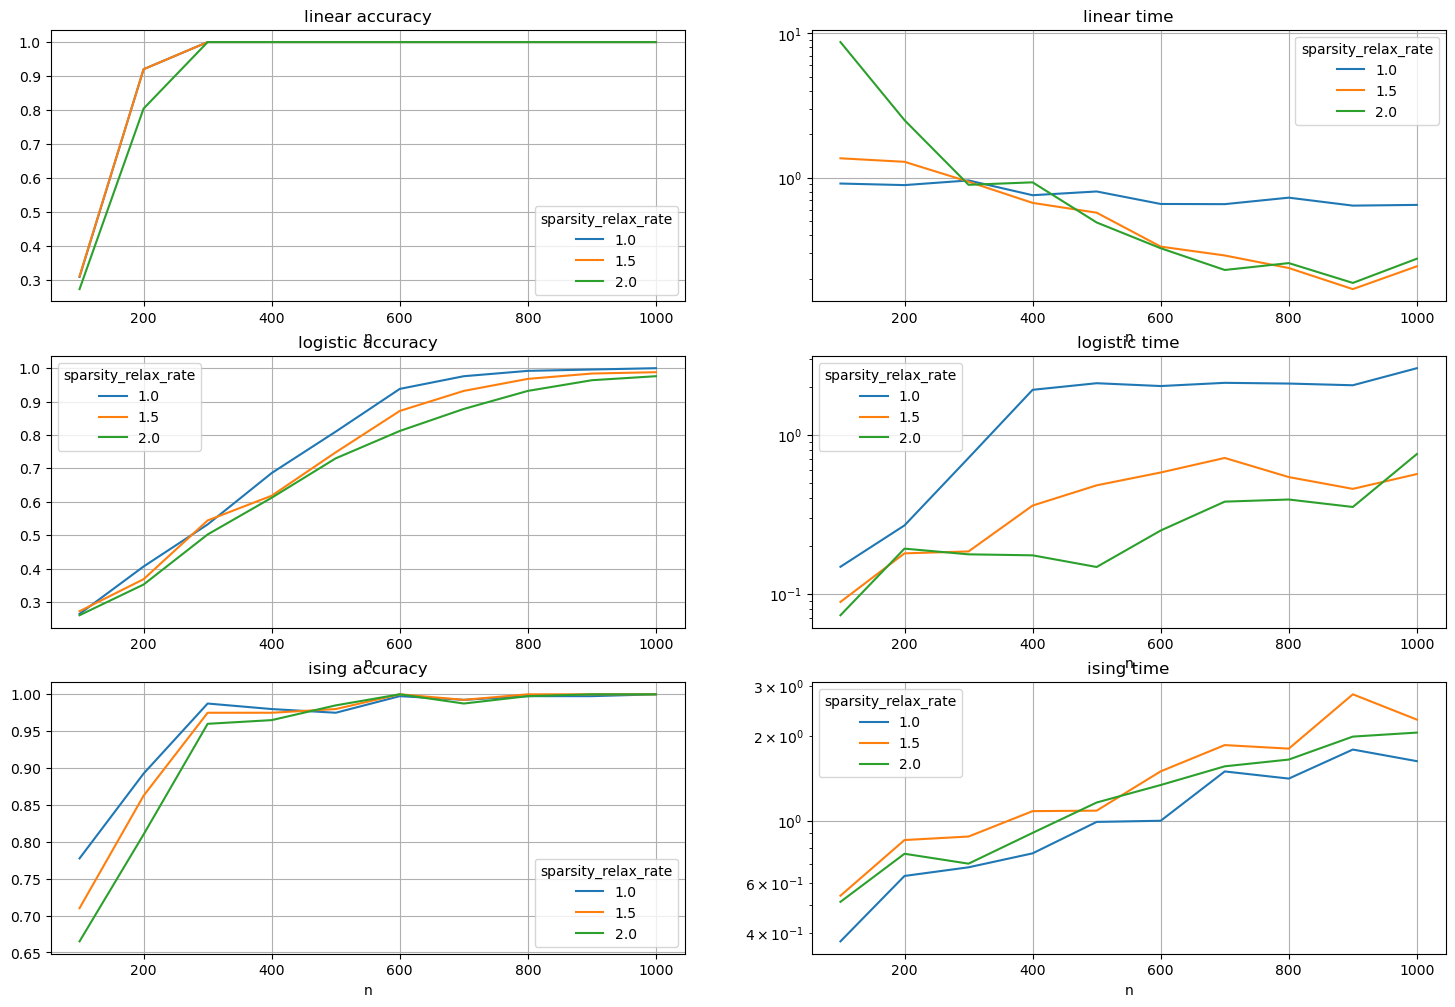

In [3]:
df = pd.read_csv("sparsity_relax.csv")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, metric in enumerate(["accuracy", "time"]):
        df[df["model"] == model].groupby(['n', 'sparsity_relax_rate'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
            logy=metric == "time",
        )

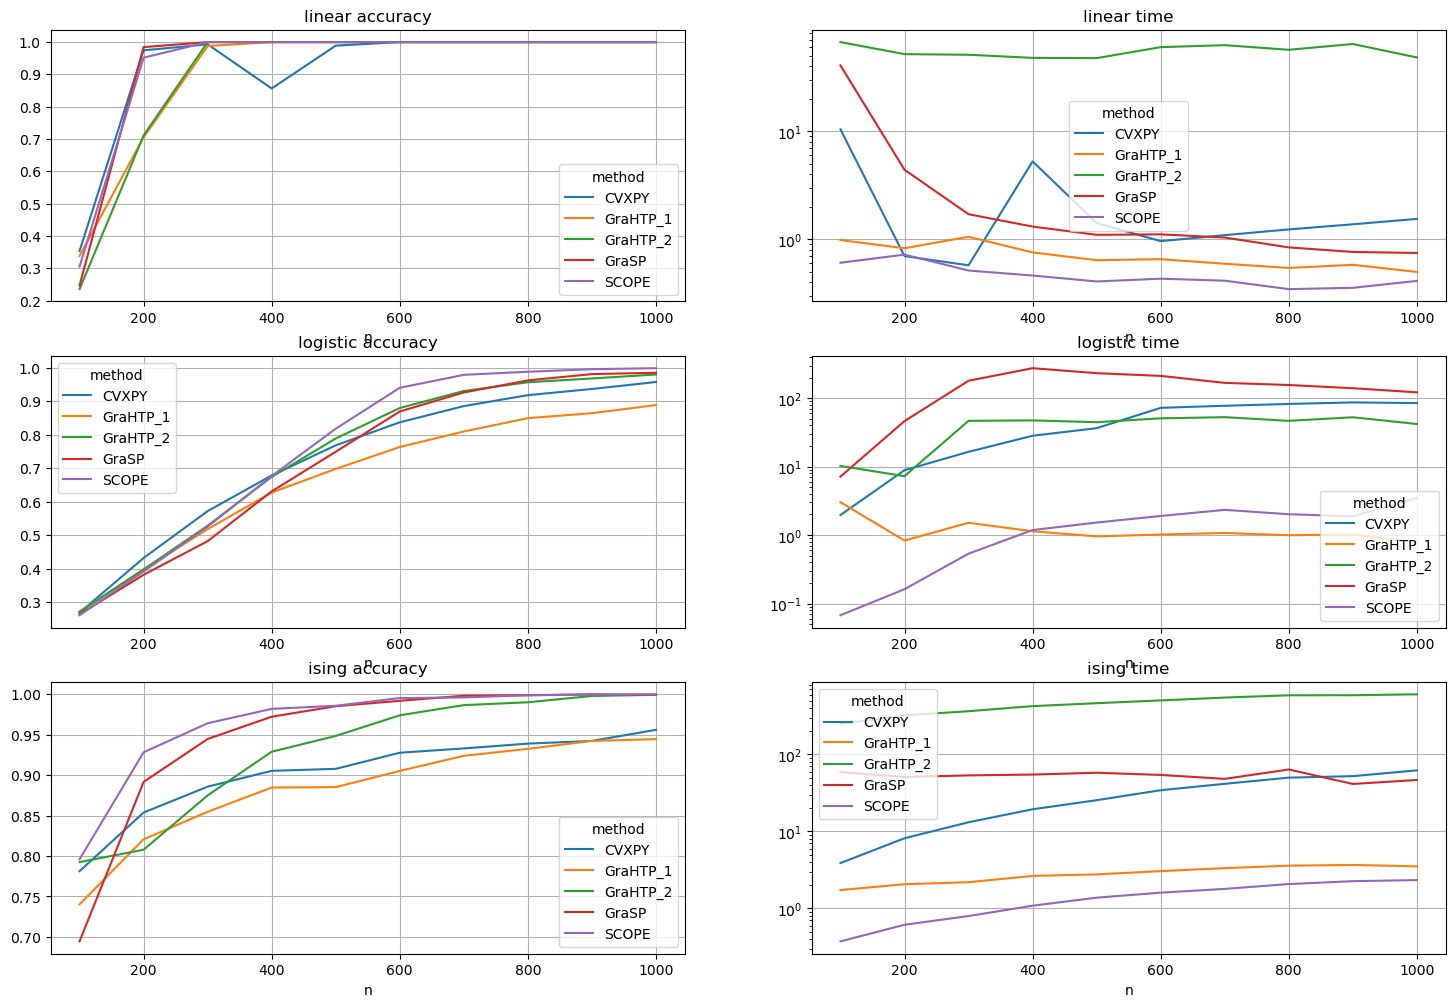

In [12]:
df = pd.read_csv("total-new.csv")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, metric in enumerate(["accuracy", "time"]):
        df[df["model"] == model].groupby(['n', 'method'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
            logy=metric == "time",
        )

In [3]:
df1 = pd.read_csv("total-1.csv")
df2 = pd.read_csv("total-2.csv")
df3 = pd.read_csv("total-3.csv")
df = pd.concat([df1, df2, df3])

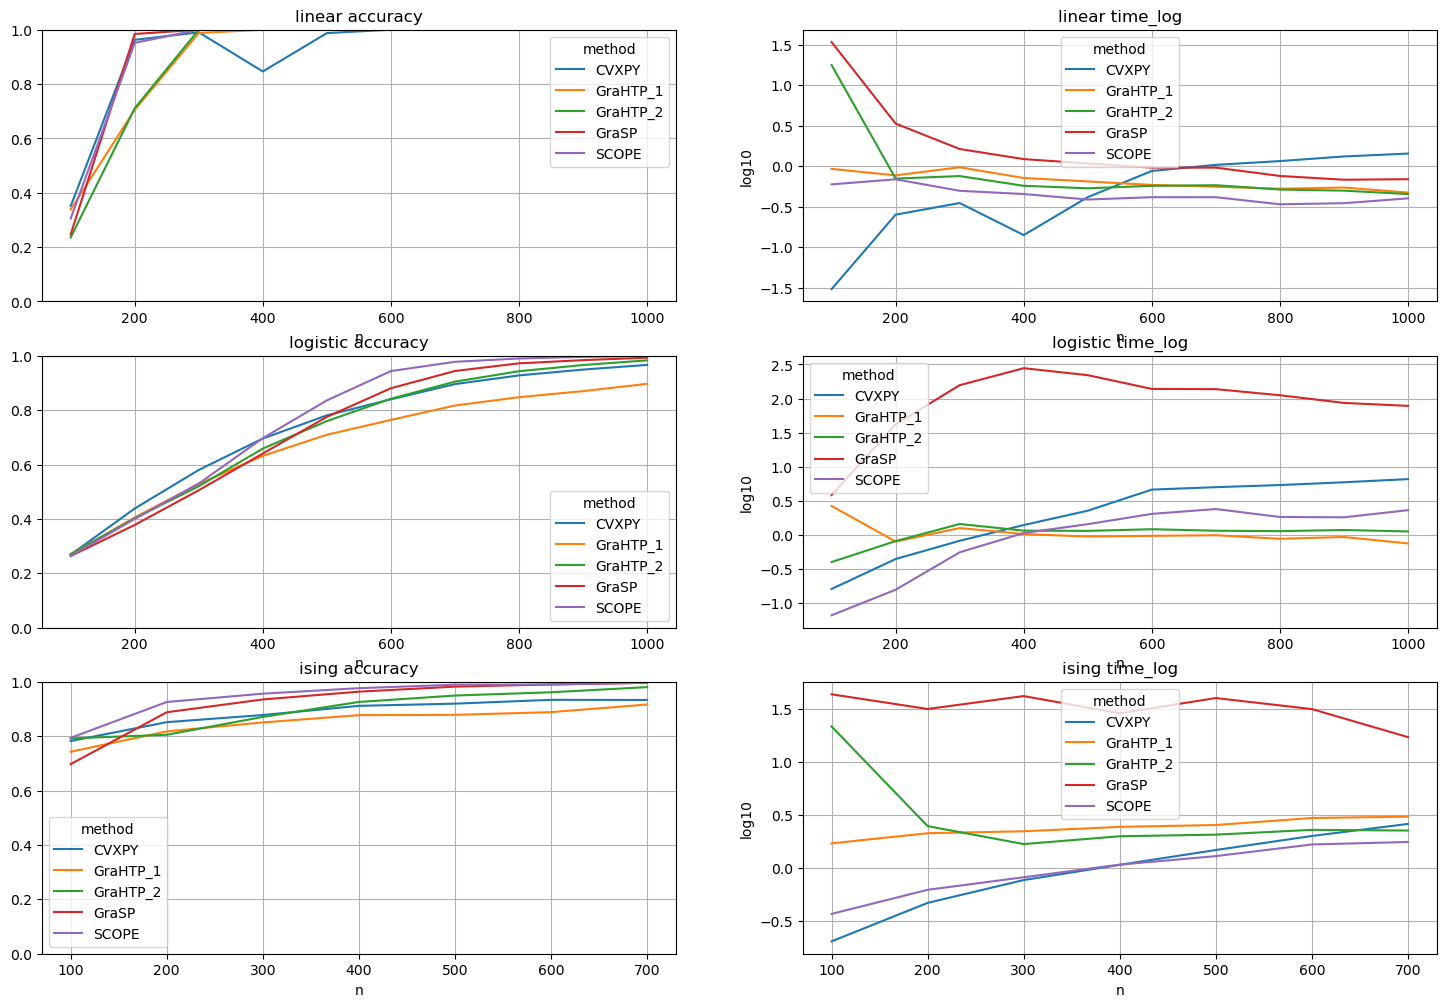

In [16]:
#df = pd.read_csv("../total-tem.csv")
df['time_log'] = np.log10(df['time'])
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for i, model in enumerate(["linear", "logistic", "ising"]):
#for i, model in enumerate(["logistic"]):
    for j, metric in enumerate(["accuracy", "time_log"]):
        df[df["model"] == model].groupby(['n', 'method'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
            ylim=(0, 1) if metric == "accuracy" else None,
            ylabel="log10" if metric == "time_log" else None,
        )

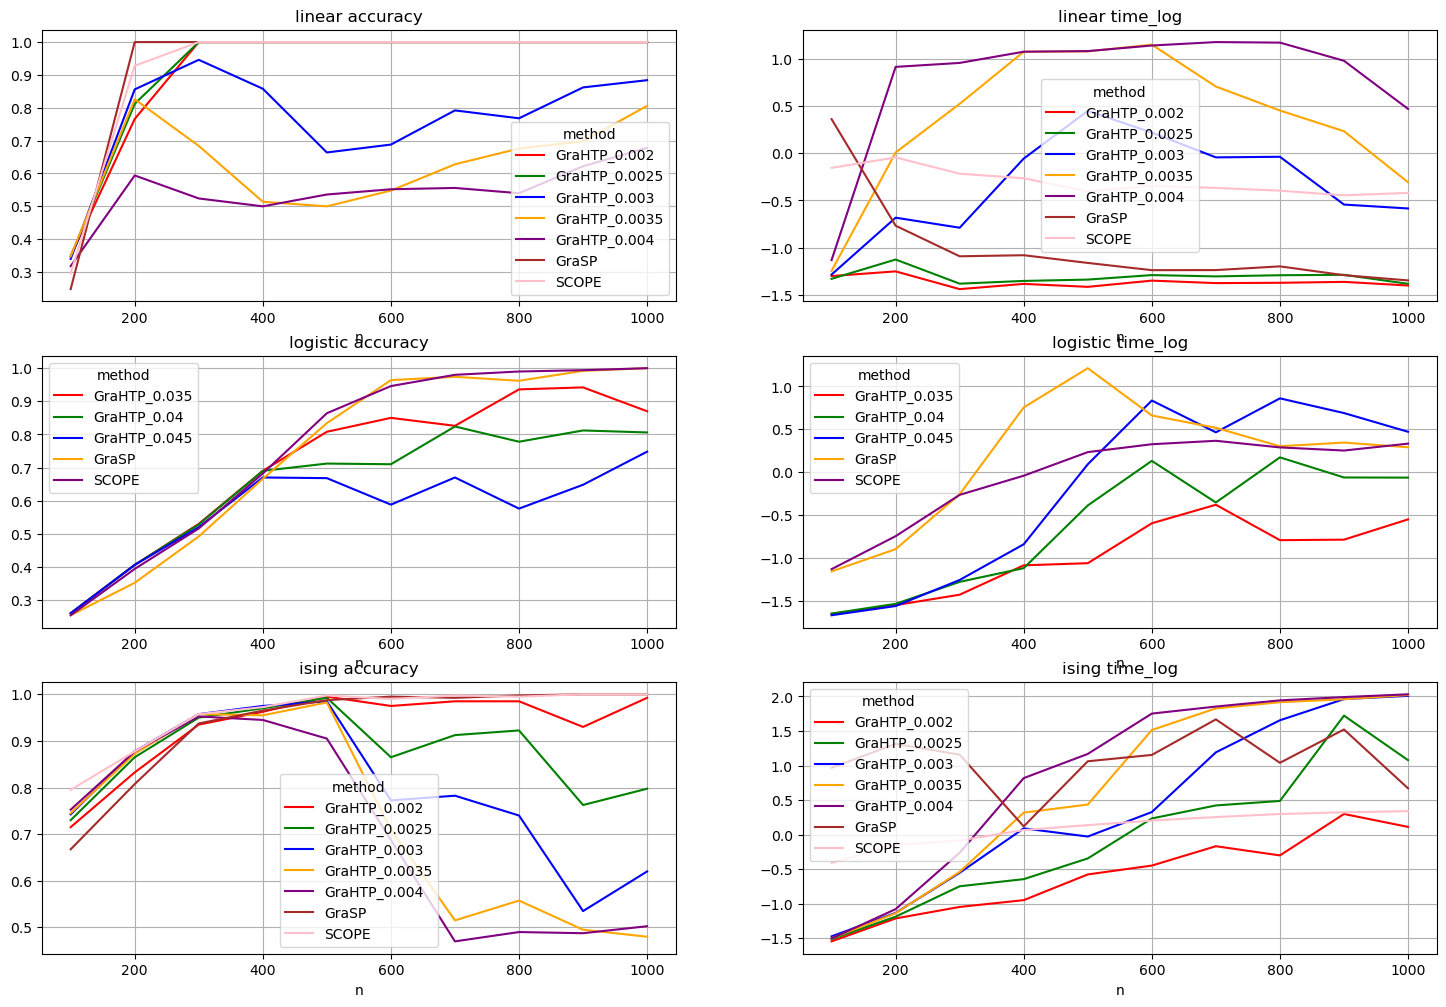

In [29]:
df1 = pd.read_csv("htp_step.csv")
df2 = pd.read_csv("htp_step-2.csv")
df = pd.concat([df1, df2])
df = df[
    (df["method"] == "SCOPE")
    | (df["method"] == "GraSP")
    | (df["method"] == "GraHTP_0.002")
    | (df["method"] == "GraHTP_0.0025")
    | (df["method"] == "GraHTP_0.003")
    | (df["method"] == "GraHTP_0.0035")
    | (df["method"] == "GraHTP_0.004")
    | (df["method"] == "GraHTP_0.035")
    | (df["method"] == "GraHTP_0.04")
    | (df["method"] == "GraHTP_0.045")
    
]
df["time_log"] = np.log10(df["time"])
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, metric in enumerate(["accuracy", "time_log"]):
        df[df["model"] == model].groupby(["n", "method"])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
            color=[
                "red",
                "green",
                "blue",
                "orange",
                "purple",
                "brown",
                "pink",
                "gray",
                "olive",
                "cyan",
                "magenta",
                "yellow",
            ],
        )

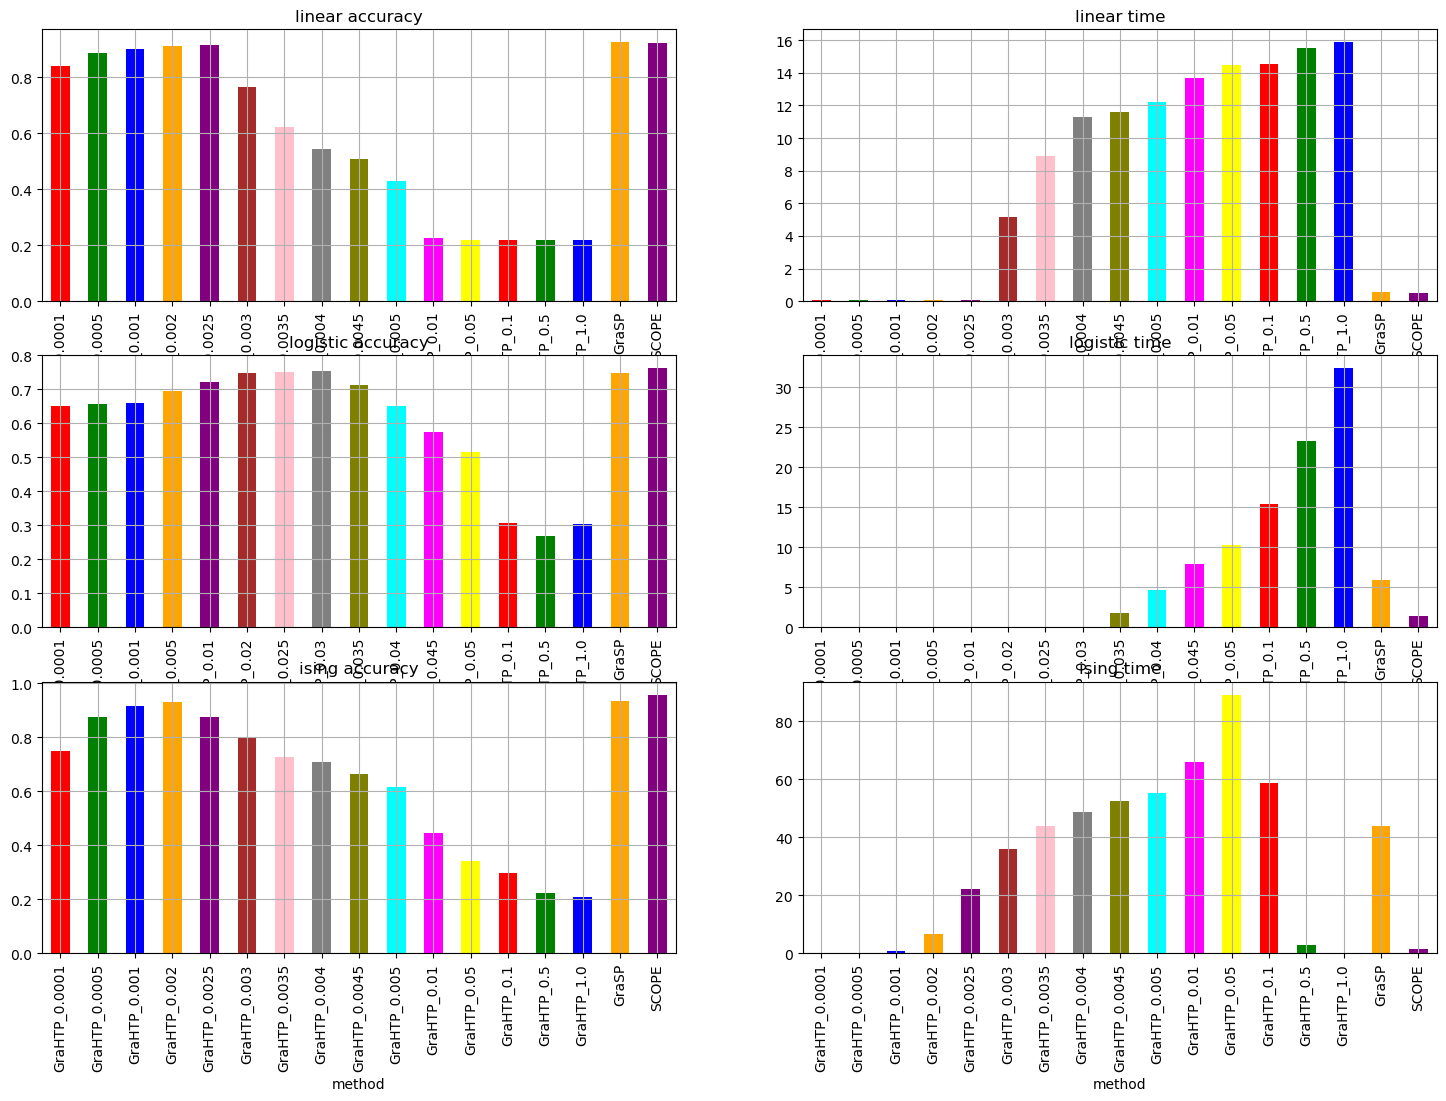

In [19]:
df1 = pd.read_csv("htp_step.csv")
df2 = pd.read_csv("htp_step-2.csv")
df = pd.concat([df1, df2])
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, metric in enumerate(["accuracy", "time"]):
        df[df["model"] == model].groupby(['method'])[metric].mean().plot(
            kind='bar',
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
            color=['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
        )

In [6]:
df[(df.model == "logistic") & (df.n >=110)].shape

(4355, 8)

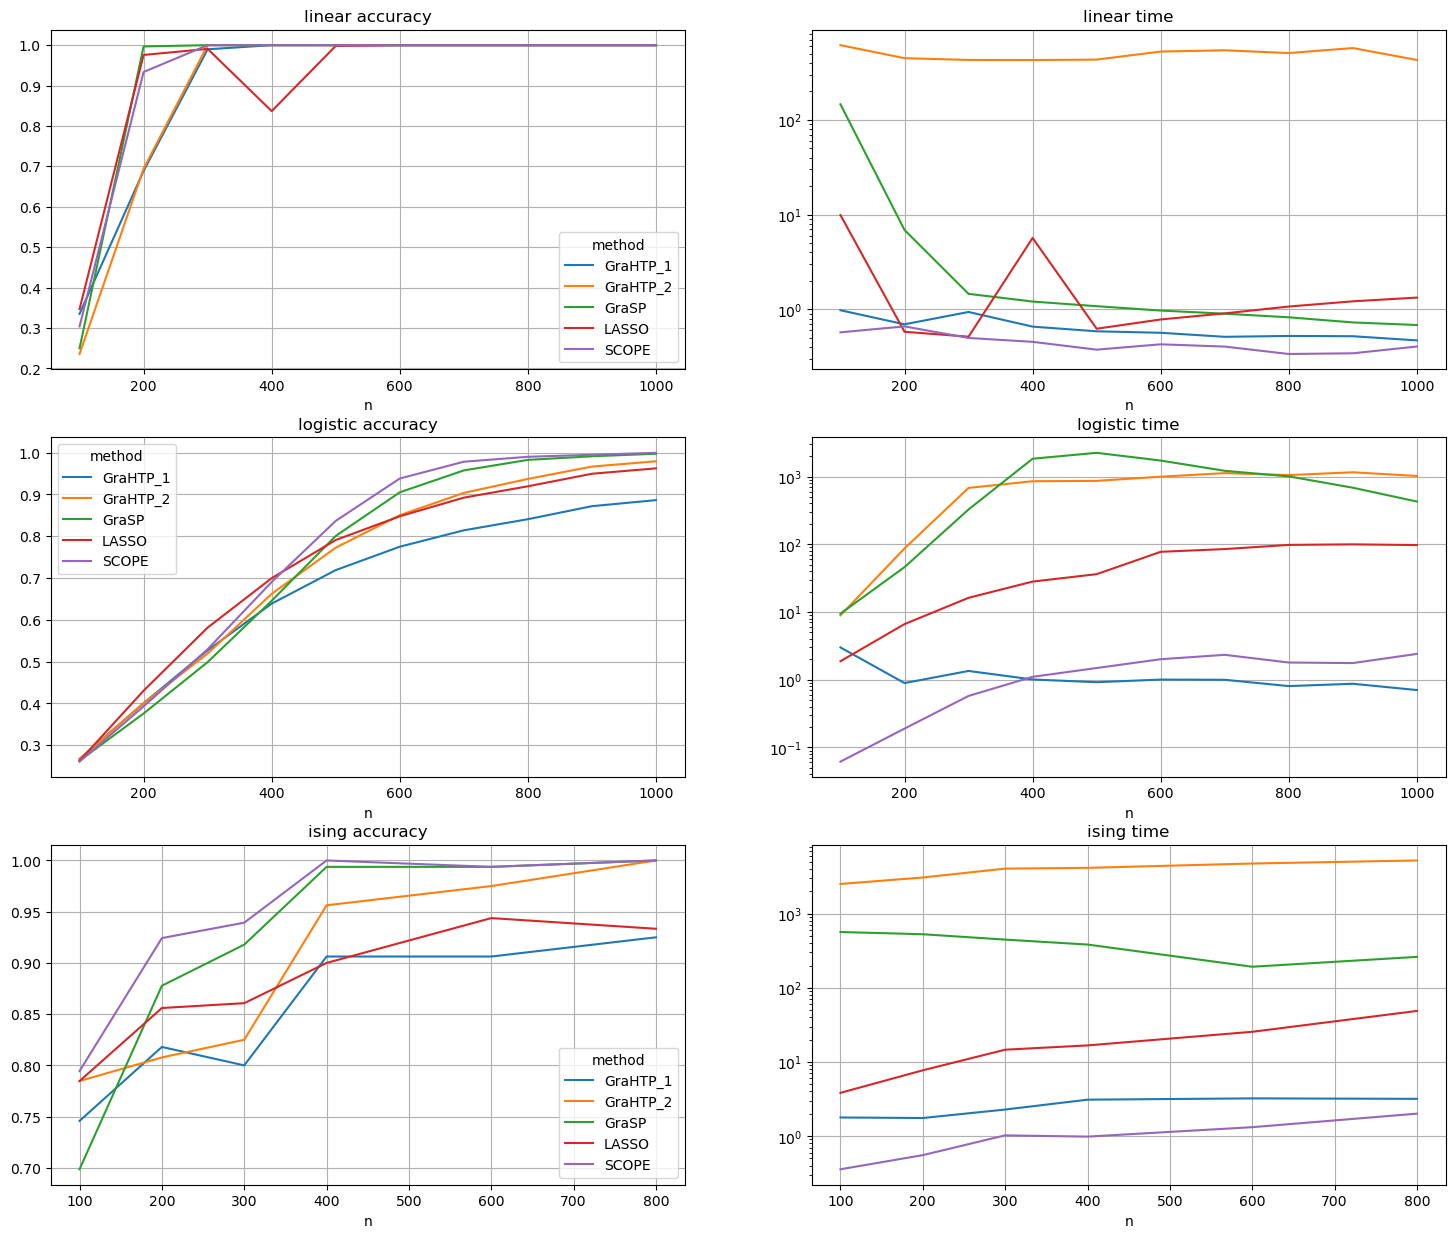

In [2]:
with open("total.out", "r") as f:
    d = [eval(line) for line in f if "nan" not in line and line.startswith("{")]
df = pd.DataFrame(d).dropna()
df.method = df.method.apply(lambda x: "LASSO" if x == "CVXPY" else x)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
for i, model in enumerate(["linear", "logistic", "ising"]):
#for i, model in enumerate(["logistic"]):
    for j, metric in enumerate(["accuracy", "time"]):
        df[(df["model"] == model) & (df.n >=100)].groupby(['n', 'method'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
            #ylim=(0, 1) if metric == "accuracy" else None,
            #ylabel="log10" if metric == "time_log" else None,
            logy= True if metric == "time" else False
        )
        if metric == "time":
            axes[i][j].legend().set_visible(False)